In [26]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import pickle
from sklearn.model_selection import train_test_split

READ DATA

In [27]:
(train_data, test_data), ds_info = tfds.load(name="emnist/digits",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

In [28]:
train_data = train_data.concatenate(test_data)

In [29]:
percentage = 0.1
num_samples = (int(ds_info.splits['train'].num_examples * percentage) + int(ds_info.splits['test'].num_examples * percentage))//10

#Sampling Label
samples = []

# Iterasi melalui setiap label
for label in range(10):  

    dataset_for_label = train_data.filter(lambda image, lbl: tf.equal(lbl, label))

    sampled_dataset = dataset_for_label.take(num_samples)

    samples.append(sampled_dataset)

In [30]:
num_samples

2800

In [31]:
sampled_dataset = tf.data.experimental.sample_from_datasets(samples)

In [32]:
# num_samples = int(ds_info.splits['train'].num_examples * percentage) + int(ds_info.splits['test'].num_examples * percentage)//10
dataset=[]

for image, label in tfds.as_numpy(sampled_dataset):
    
        dataset.append({
            'image': image,
            'label': int(label)
        })
    

2024-03-05 21:08:47.363154: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-03-05 21:08:47.569088: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-03-05 21:08:47.585612: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. I

In [35]:
with open('dataset_10percent.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [34]:
with open('dataset_10percent.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [36]:
dataset = sorted(dataset, key=lambda d: d['label'])
class_num = [0]*10

for i in dataset:
    class_num[i['label']]+=1

class_num

[2800, 2800, 2800, 2800, 2800, 2800, 2800, 2800, 2800, 2800]

In [37]:
len(dataset)

28000

In [38]:
X = []
Y = []
for i in range(len(dataset)):
  X.append(tf.cast(dataset[i]['image'], tf.float32) / 255)
  Y.append(tf.one_hot(dataset[i]['label'], depth=10))

X = np.array(X)
Y = np.array(Y)

In [39]:
with open('datax.pkl','wb') as f:
    pickle.dump(X, f)

with open('datay.pkl','wb') as f:
    pickle.dump(Y, f)

In [40]:
with open('datax.pkl','rb') as f:
    X = pickle.load(f)
with open('datay.pkl','rb') as f:
    Y = pickle.load(f)

In [41]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
with open('x_train.pkl','wb') as f:
    pickle.dump(Xtrain, f)

with open('y_train.pkl','wb') as f:
    pickle.dump(Ytrain, f)

with open('x_test.pkl','wb') as f:
    pickle.dump(Xtest, f)

with open('y_test.pkl','wb') as f:
    pickle.dump(Ytest, f)

In [ ]:
with open('x_train.pkl','rb') as f:
    Xtrain = pickle.load(f)
with open('y_train.pkl','rb') as f:
    Ytrain = pickle.load(f)

with open('x_test.pkl','rb') as f:
    Xtest = pickle.load(f)
with open('y_test.pkl','rb') as f:
    Ytest = pickle.load(f)

Data Plotting

In [43]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

Alexnet

In [44]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(28,28,1)),
        keras.layers.Conv2D(96, kernel_size=(3,3), strides=(1,1), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 384)        

In [45]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
history_alexnet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
1400/1400 [==============================] - 19s 12ms/step - loss: 0.3177 - accuracy: 0.9026 - val_loss: 0.0818 - val_accuracy: 0.9789
Epoch 2/10
1400/1400 [==============================] - 17s 12ms/step - loss: 0.1131 - accuracy: 0.9708 - val_loss: 0.0922 - val_accuracy: 0.9796
Epoch 3/10
1400/1400 [==============================] - 17s 12ms/step - loss: 0.0872 - accuracy: 0.9790 - val_loss: 0.1160 - val_accuracy: 0.9750
Epoch 4/10
1400/1400 [==============================] - 17s 12ms/step - loss: 0.0798 - accuracy: 0.9811 - val_loss: 0.0989 - val_accuracy: 0.9809
Epoch 5/10
1400/1400 [==============================] - 17s 12ms/step - loss: 0.0761 - accuracy: 0.9822 - val_loss: 0.0994 - val_accuracy: 0.9812
Epoch 6/10
1400/1400 [==============================] - 17s 12ms/step - loss: 0.0662 - accuracy: 0.9848 - val_loss: 0.1027 - val_accuracy: 0.9855
Epoch 7/10
1400/1400 [==============================] - 17s 12ms/step - loss: 0.0708 - accuracy: 0.9840 - val_loss: 0.1275 -

In [47]:
with open('history_alexnet.pkl', 'wb') as f:
    pickle.dump(history_alexnet, f)

In [ ]:
with open('history_alexnet.pkl', 'rb') as f:
    history_alexnet = pickle.load(f)

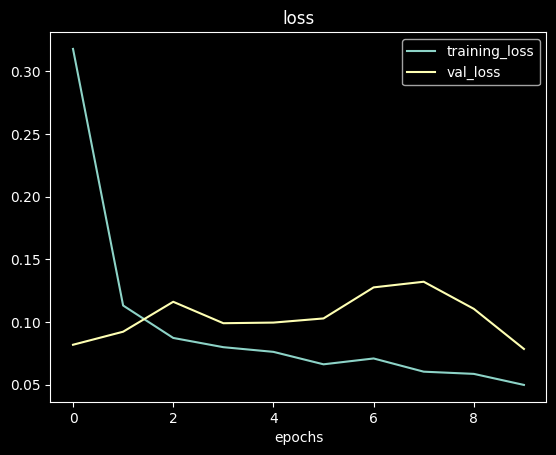

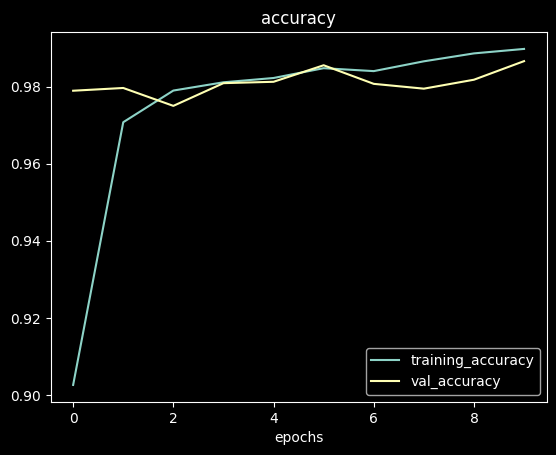

In [48]:
plot_loss_curves(history_alexnet)

LENET

In [49]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [50]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [51]:
history_lenet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
1400/1400 [==============================] - 9s 5ms/step - loss: 1.0271 - accuracy: 0.6731 - val_loss: 0.2734 - val_accuracy: 0.9246
Epoch 2/10
1400/1400 [==============================] - 6s 5ms/step - loss: 0.1978 - accuracy: 0.9417 - val_loss: 0.1490 - val_accuracy: 0.9564
Epoch 3/10
1400/1400 [==============================] - 7s 5ms/step - loss: 0.1222 - accuracy: 0.9635 - val_loss: 0.1047 - val_accuracy: 0.9686
Epoch 4/10
1400/1400 [==============================] - 8s 6ms/step - loss: 0.0895 - accuracy: 0.9722 - val_loss: 0.0915 - val_accuracy: 0.9707
Epoch 5/10
1400/1400 [==============================] - 8s 6ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0785 - val_accuracy: 0.9762
Epoch 6/10
1400/1400 [==============================] - 8s 5ms/step - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0792 - val_accuracy: 0.9745
Epoch 7/10
1400/1400 [==============================] - 8s 6ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0808 - val_accuracy:

In [52]:
with open('history_lenet.pkl', 'wb') as f:
    pickle.dump(history_lenet, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_lenet = pickle.load(f)

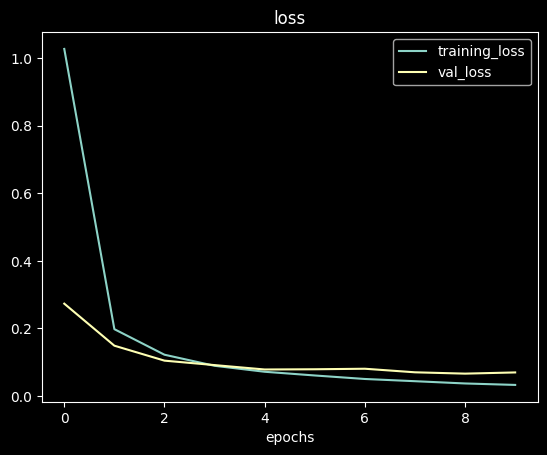

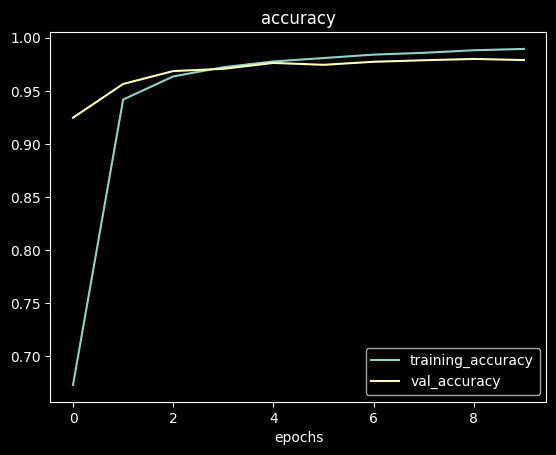

In [53]:
plot_loss_curves(history_lenet)

CUSTOM MODEL

In [ ]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),

      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),

      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_custom = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

In [ ]:
with open('history_custom.pkl', 'wb') as f:
    pickle.dump(history_custom, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_custom = pickle.load(f)

In [ ]:
plot_loss_curves(history_custom)